# Introduction

Gumbi simplifies the steps needed to build a Gaussian Process model from tabular data. It takes care of shaping,
transforming, and standardizing data as necessary while applying best practices and sensible defaults to the
construction of the GP model itself. Taking inspiration from popular packages such as
__[Bambi](https://bambinos.github.io/bambi/main/index.html)__ and __[Seaborn](https://seaborn.pydata.org/index.html)__,
Gumbi's aim is to allow quick iteration on both model structure and prediction visualization. Gumbi is primarily designed with the experimental scientist in mind, and enabling easy implementation of Bayesian Optimization into laboratory workflows. Gumbi is primarily built
on top of __[Pymc](https://docs.pymc.io/)__, with a __[Botorch](https://botorch.org/)__ backend provided for acceleration and Bayesian Optimization.

## Quickstart

Read in some data and store it as a Gumbi `DataSet`:


In [2]:
import gumbi as gmb
import seaborn as sns
cars = sns.load_dataset('mpg').dropna()
ds = gmb.DataSet(cars, outputs=['mpg', 'acceleration'], log_vars=['mpg', 'acceleration', 'horsepower'])


Create a Gumbi `GP` object and fit a model that predicts *mpg* from *horsepower*:

In [3]:
gp = gmb.GP(ds)
gp.fit(outputs=['mpg'], continuous_dims=['horsepower']);

/home/john/projects/gumbi/gumbi/utils/gp_utils.py:64: FutureWarning: find_constrained_prior is deprecated and will be removed in a future version. Please use maxent function from PreliZ. https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.unidimensional.maxent
  params_ls = pm.find_constrained_prior(
/home/john/mambaforge/envs/gumbi-test/lib/python3.11/site-packages/pytensor/link/c/cmodule.py:2959: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-tes

Output()


Make predictions and plot!

<Axes: xlabel='horsepower', ylabel='mpg'>

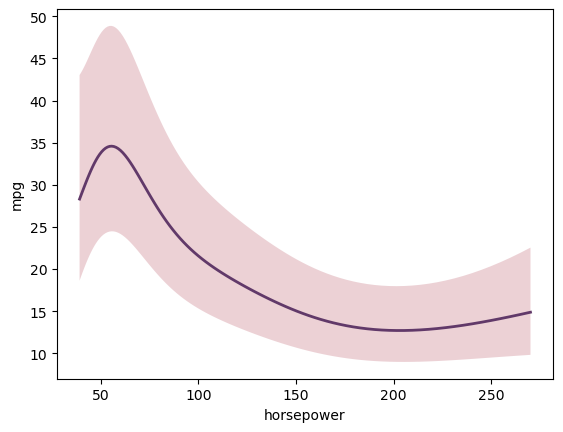

In [4]:
X = gp.prepare_grid()
y = gp.predict_grid()
gmb.ParrayPlotter(X, y).plot()


More complex GPs are also possible, such as correlated multi-input and multi-output systems, demonstrated in the example notebooks.

## Installation
### Via pip

    pip install gumbi

### Bleeding edge

    pip install git+git://github.com/JohnGoertz/Gumbi.git@develop

### Local development

* Clone the repo and navigate to the new directory

  * `git clone https://gitlab.com/JohnGoertz/gumbi gumbi`

  * `cd gumbi`

* Create a new conda environment using mamba

  * `conda install mamba`

  * `mamba install -f gumbi_env.yaml`

* Install `gumbi` via `pip` in editable/development mode

  * From within the `gumbi` repo

  * `pip install --editable ./`

* To update the `gumbi` module

  * From within the `gumbi` repo

  * `git pull`
